In [80]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df1 = pd.read_csv('2018-2019 ongc.txt', delimiter='\t', encoding='utf-16')

In [55]:
df1.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-12-2019,128.80,131.05,131.45,124.05,168.14M,-2.24%
1,01-11-2019,131.75,140.55,149.65,129.25,165.12M,-7.02%
2,01-10-2019,141.70,131.50,146.15,123.95,229.64M,7.51%
3,01-09-2019,131.80,120.50,140.85,115.55,271.43M,8.75%
4,01-08-2019,121.20,138.50,139.75,115.75,234.73M,-12.71%


In [57]:
df2 = pd.read_csv('2020-2021 ongc.txt', delimiter='\t', encoding='utf-16')

In [65]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-12-2021,142.40,142.40,150.50,131.65,228.70M,0.21%
1,01-11-2021,142.10,150.00,162.25,141.10,357.50M,-4.66%
2,01-10-2021,149.05,145.20,172.75,144.10,685.08M,3.15%
3,01-09-2021,144.50,121.80,148.80,117.50,543.96M,19.87%
4,01-08-2021,120.55,114.95,121.00,108.50,281.21M,4.55%


In [59]:
df3 = pd.read_csv('2022-2023 ongc.txt', delimiter='\t', encoding='utf-16')

In [67]:
df3.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01-12-2021,142.40,142.40,150.50,131.65,228.70M,0.21%
1,01-11-2021,142.10,150.00,162.25,141.10,357.50M,-4.66%
2,01-10-2021,149.05,145.20,172.75,144.10,685.08M,3.15%
3,01-09-2021,144.50,121.80,148.80,117.50,543.96M,19.87%
4,01-08-2021,120.55,114.95,121.00,108.50,281.21M,4.55%


In [75]:
df4 = pd.read_csv('Crude Oil WTI Futures Historical Data (5) (1).txt', delimiter='\t', encoding='utf-8')

In [77]:
df4.head()

,Date Price Open High Low Vol. Change %
0,01-12-2023 6128 6425 6425 5765 1.47K -4.43%
1,01-11-2023 6412 6891 6891 6110 11.15K -5.66%
2,01-10-2023 6797 7200 7298 62 2.88M -7.41%
3,01-09-2023 7341 6985 7574 6985 0.43K 9.49%
4,01-08-2023 6705 6655 6958 6539 0.81K 1.50%


## Shapiro-Wilk Test

In [82]:
datasets = {'2018-2019 ongc.txt': df1, '2020-2021 ongc.txt': df2, '2022-2023 ongc.txt': df3, 'Crude Oil WTI Futures Historical Data (5) (1).txt': df4}


Normality Test for 2018-2019 ongc.txt
Shapiro-Wilk Test for Price: Statistics=0.971, p-value=0.679
Price seems to follow a normal distribution (fail to reject H0)


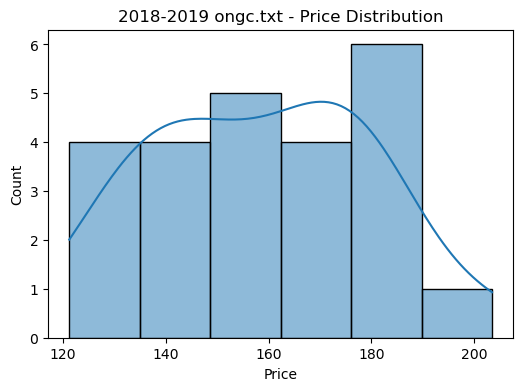

Shapiro-Wilk Test for Open: Statistics=0.978, p-value=0.850
Open seems to follow a normal distribution (fail to reject H0)


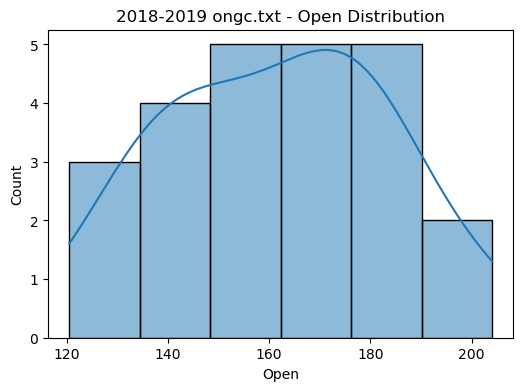

Shapiro-Wilk Test for High: Statistics=0.975, p-value=0.797
High seems to follow a normal distribution (fail to reject H0)


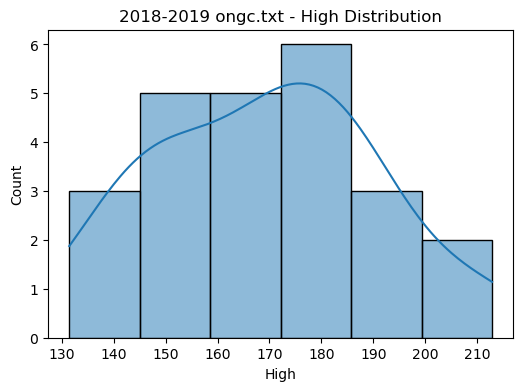

Shapiro-Wilk Test for Low: Statistics=0.975, p-value=0.794
Low seems to follow a normal distribution (fail to reject H0)


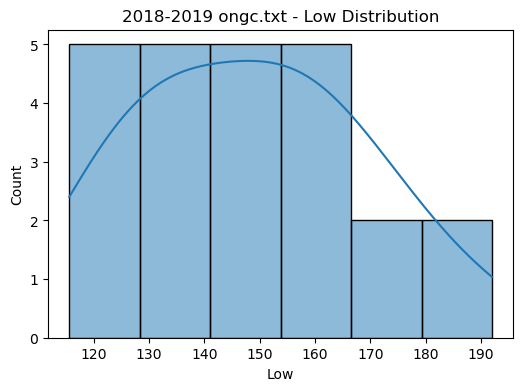


Normality Test for 2020-2021 ongc.txt
Shapiro-Wilk Test for Price: Statistics=0.931, p-value=0.101
Price seems to follow a normal distribution (fail to reject H0)


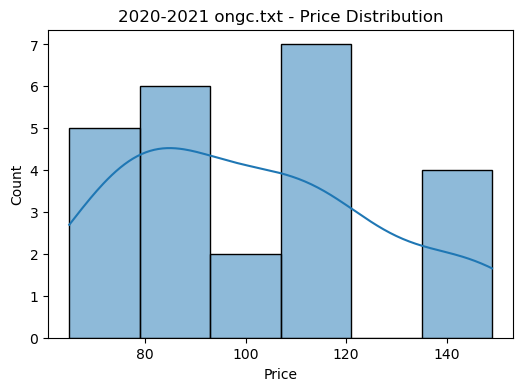

Shapiro-Wilk Test for Open: Statistics=0.946, p-value=0.219
Open seems to follow a normal distribution (fail to reject H0)


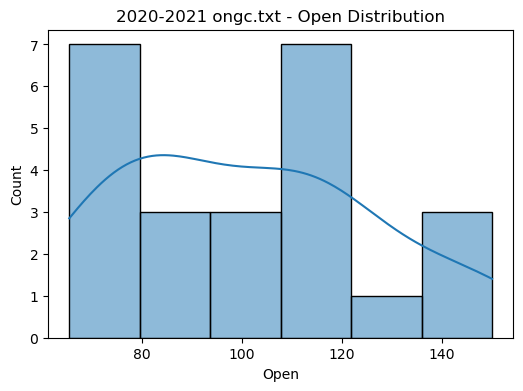

Shapiro-Wilk Test for High: Statistics=0.942, p-value=0.184
High seems to follow a normal distribution (fail to reject H0)


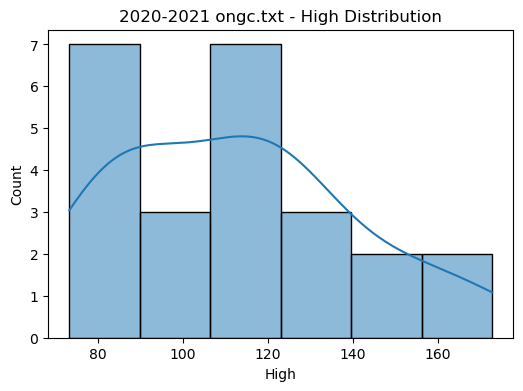

Shapiro-Wilk Test for Low: Statistics=0.963, p-value=0.511
Low seems to follow a normal distribution (fail to reject H0)


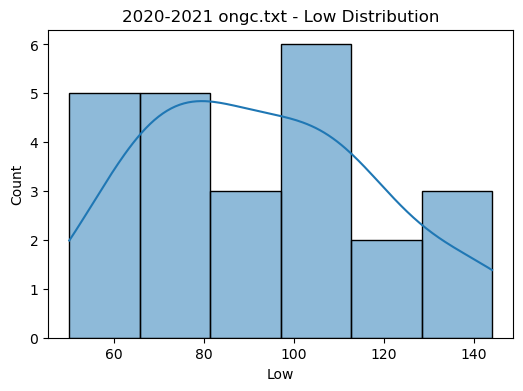


Normality Test for 2022-2023 ongc.txt
Shapiro-Wilk Test for Price: Statistics=0.931, p-value=0.101
Price seems to follow a normal distribution (fail to reject H0)


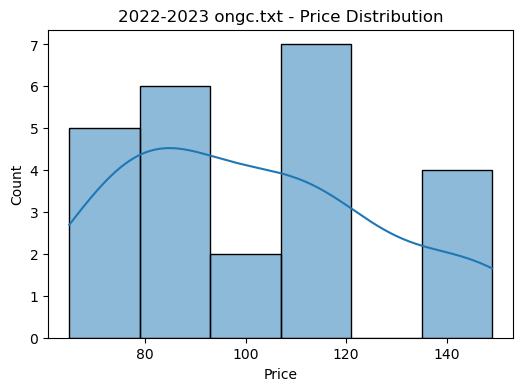

Shapiro-Wilk Test for Open: Statistics=0.946, p-value=0.219
Open seems to follow a normal distribution (fail to reject H0)


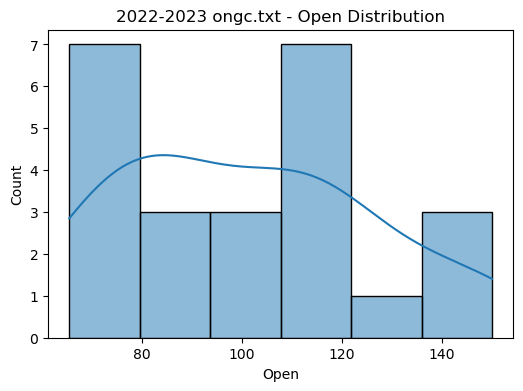

Shapiro-Wilk Test for High: Statistics=0.942, p-value=0.184
High seems to follow a normal distribution (fail to reject H0)


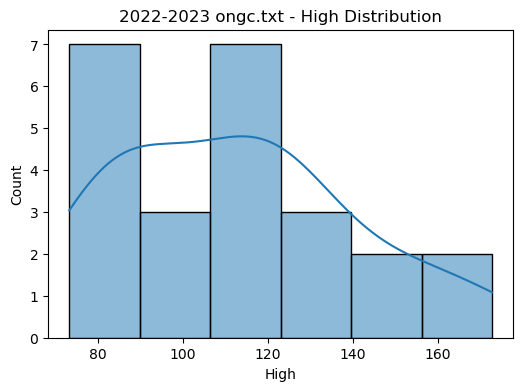

Shapiro-Wilk Test for Low: Statistics=0.963, p-value=0.511
Low seems to follow a normal distribution (fail to reject H0)


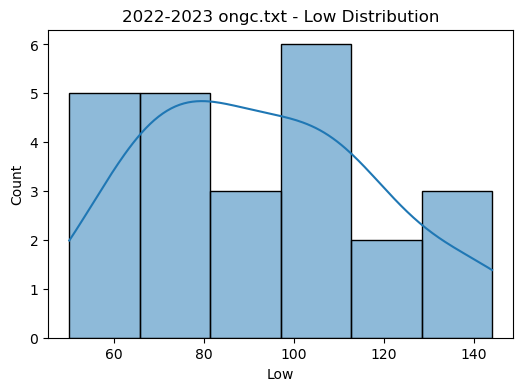


Normality Test for Crude Oil WTI Futures Historical Data (5) (1).txt


In [84]:
# Function to test normality using Shapiro-Wilk test
def test_normality(data, column):
    stat, p = stats.shapiro(data[column].dropna())  # Remove missing values if any
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print(f"{column} seems to follow a normal distribution (fail to reject H0)")
    else:
        print(f"{column} does not follow a normal distribution (reject H0)")

# Plot the data distribution and perform Shapiro-Wilk test for each dataset
for name, df in datasets.items():
    print(f"\nNormality Test for {name}")
    
    for column in df.columns:  # Loop through each column of the dataset
        if pd.api.types.is_numeric_dtype(df[column]):  # Only test numerical columns
            # Test normality
            test_normality(df, column)
            
            # Plot distribution
            plt.figure(figsize=(6, 4))
            sns.histplot(df[column].dropna(), kde=True)
            plt.title(f'{name} - {column} Distribution')
            plt.show()